# PHM 2016 Challenge数据集三个Mode的实验
数据的输入特征提取的五个统计特征
实验（1）统计特征
实验（2）统计特征+model的LabelEncoder编码

### 类别LabelEncoder编码后作为模型输入

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

In [2]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, BayesianRidge
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
Train_data = pd.read_csv('./data phm 2016/Train_data.csv')

In [4]:
Test_data = pd.read_csv('./data phm 2016/Test_data.csv')

In [5]:
Train_data.shape, Test_data.shape

((672744, 26), (156262, 26))

In [6]:
Train_data.head()

MACHINE_ID  MACHINE_DATA     TIMESTAMP    WAFER_ID STAGE  CHAMBER  \
0           2             4  4.845684e+08  2941014050     B      4.0   
1           2             4  4.845684e+08  2941014050     B      4.0   
2           2             4  4.845684e+08  2941014050     B      4.0   
3           2             4  4.845684e+08  2941014050     B      4.0   
4           2             4  4.845684e+08  2941014050     B      4.0   

   USAGE_OF_BACKING_FILM  USAGE_OF_DRESSER  USAGE_OF_POLISHING_TABLE  \
0                 1240.0        282.592593                 190.37037   
1                 1240.0        282.592593                 190.37037   
2                 1240.0        282.592593                 190.37037   
3                 1240.0        282.592593                 190.37037   
4                 1240.0        282.592593                 190.37037   

   USAGE_OF_DRESSER_TABLE  ...  USAGE_OF_PRESSURIZED_SHEET  \
0                  3522.0  ...                       372.0   
1                  3522.0  ...                       372.0   
2                  3522.0  ...                       372.0   
3                  3522.0  ...                       372.0   
4                  3522.0  ...                       372.0   

   SLURRY_FLOW_LINE_A  SLURRY_FLOW_LINE_B  SLURRY_FLOW_LINE_C  WAFER_ROTATION  \
0            2.222222            0.909091                 0.0             0.0   
1            4.444444            0.909091                86.8             0.0   
2           12.638889            0.909091               210.0             0.0   
3           15.972222            0.909091               294.0             0.0   
4           18.194444            0.909091               344.4             0.0   

   STAGE_ROTATION  HEAD_ROTATION  DRESSING_WATER_STATUS  \
0             0.0          160.0                    1.0   
1             0.0          160.0                    1.0   
2             0.0          160.0                    1.0   
3             0.0          160.0                    1.0   
4             0.0          160.0                    1.0   

   EDGE_AIR_BAG_PRESSURE  AVG_REMOVAL_RATE  
0                    0.0           87.0621  
1                    0.0           87.0621  
2                    0.0           87.0621  
3                    0.0           87.0621  
4                    0.0           87.0621  

[5 rows x 26 columns]

In [7]:
df_modeI = pd.read_csv('./data phm 2016/Train_data_modeI_chamber4.csv')

In [8]:
set(Train_data['CHAMBER']), set(Train_data['STAGE'])

({1.0, 2.0, 3.0, 4.0, 5.0, 6.0}, {'A', 'B'})

In [9]:
set(Train_data['MACHINE_DATA']), set(Train_data['MACHINE_ID'])

({1, 2, 3, 4, 5, 6}, {2})

In [10]:
set(Test_data['CHAMBER']), set(Test_data['STAGE'])

({1.0, 2.0, 3.0, 4.0, 5.0, 6.0}, {'A', 'B'})

In [11]:
set(Test_data['MACHINE_DATA']), set(Test_data['MACHINE_ID'])

({1, 2, 3, 4, 5, 6}, {2})

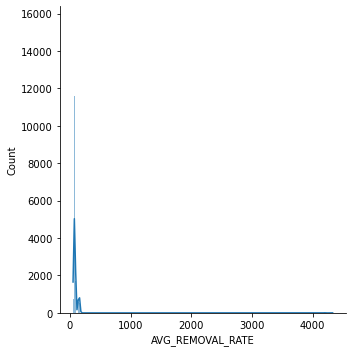

In [12]:
sns.displot(Train_data['AVG_REMOVAL_RATE'], kde=True)

## 处理数据，数据分布状态

In [13]:
set(Train_data[Train_data['MACHINE_DATA']==1]['CHAMBER'])

{1.0}

In [14]:
set(Train_data[Train_data['MACHINE_DATA']==2]['CHAMBER'])

{2.0}

In [15]:
set(Train_data[Train_data['MACHINE_DATA']==3]['CHAMBER'])

{3.0}

In [16]:
set(Train_data[Train_data['MACHINE_DATA']==4]['CHAMBER'])

{4.0}

In [17]:
set(Train_data[Train_data['MACHINE_DATA']==5]['CHAMBER'])

{5.0}

In [18]:
set(Train_data[Train_data['MACHINE_DATA']==6]['CHAMBER'])

{6.0}

In [19]:
set(Test_data[Test_data['MACHINE_DATA']==1]['CHAMBER'])

{1.0}

In [20]:
set(Test_data[Test_data['MACHINE_DATA']==2]['CHAMBER'])

{2.0}

In [21]:
set(Test_data[Test_data['MACHINE_DATA']==3]['CHAMBER'])

{3.0}

In [22]:
set(Test_data[Test_data['MACHINE_DATA']==4]['CHAMBER'])

{4.0}

In [23]:
set(Test_data[Test_data['MACHINE_DATA']==5]['CHAMBER'])

{5.0}

In [24]:
set(Test_data[Test_data['MACHINE_DATA']==6]['CHAMBER'])

{6.0}

In [25]:
df_tmp = Train_data[Train_data['MACHINE_DATA']==1]

In [26]:
set(Train_data[Train_data['MACHINE_DATA']==1]['STAGE'])

{'A'}

In [27]:
set(Train_data[Train_data['MACHINE_DATA']==2]['STAGE'])

{'A'}

In [28]:
set(Train_data[Train_data['MACHINE_DATA']==3]['STAGE'])

{'A'}

In [29]:
set(Train_data[Train_data['MACHINE_DATA']==4]['STAGE'])

{'A', 'B'}

In [30]:
set(Train_data[Train_data['MACHINE_DATA']==5]['STAGE'])

{'A', 'B'}

In [31]:
set(Train_data[Train_data['MACHINE_DATA']==6]['STAGE'])

{'A', 'B'}

In [32]:
set(Test_data[Test_data['MACHINE_DATA']==1]['STAGE'])

{'A'}

In [33]:
set(Test_data[Test_data['MACHINE_DATA']==2]['STAGE'])

{'A'}

In [34]:
set(Test_data[Test_data['MACHINE_DATA']==3]['STAGE'])

{'A'}

In [35]:
set(Test_data[Test_data['MACHINE_DATA']==4]['STAGE'])

{'A', 'B'}

In [36]:
set(Test_data[Test_data['MACHINE_DATA']==5]['STAGE'])

{'A', 'B'}

In [37]:
set(Test_data[Test_data['MACHINE_DATA']==6]['STAGE'])

{'A', 'B'}

In [38]:
df_modeI = Train_data[(Train_data['CHAMBER'].isin([4,5,6])) & (Train_data['STAGE']=='A')]

In [39]:
df_modeII = Train_data[(Train_data['CHAMBER'].isin([4,5,6])) & (Train_data['STAGE']=='B')]

In [40]:
df_modeIII = Train_data[(Train_data['CHAMBER'].isin([1,2,3])) & (Train_data['STAGE']=='A')]
df_modeIII = df_modeIII[df_modeIII['AVG_REMOVAL_RATE']<1000]# outlier

/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

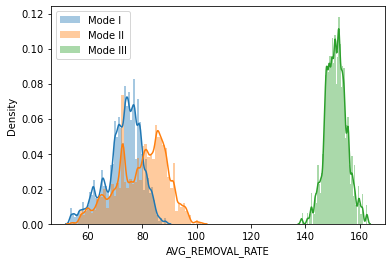

In [41]:
plt.figure()
sns.distplot(df_modeI['AVG_REMOVAL_RATE'], label='Mode I')
sns.distplot(df_modeII['AVG_REMOVAL_RATE'], label='Mode II')
sns.distplot(df_modeIII[df_modeIII['AVG_REMOVAL_RATE']<1000]['AVG_REMOVAL_RATE'], label='Mode III')
plt.legend()
plt.show()

In [42]:
df_modeIII[df_modeIII['AVG_REMOVAL_RATE']>=1000]['AVG_REMOVAL_RATE'].describe() # ModeIII的MRR值有超过4000

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: AVG_REMOVAL_RATE, dtype: float64

In [43]:
df_modeI_test = Test_data[(Test_data['CHAMBER'].isin([4,5,6])) & (Test_data['STAGE']=='A')]
df_modeII_test = Test_data[(Test_data['CHAMBER'].isin([4,5,6])) & (Test_data['STAGE']=='B')]
df_modeIII_test = Test_data[(Test_data['CHAMBER'].isin([1,2,3])) & (Test_data['STAGE']=='A')]

/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

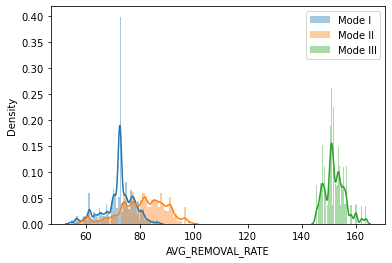

In [44]:
plt.figure()
sns.distplot(df_modeI_test['AVG_REMOVAL_RATE'], label='Mode I')
sns.distplot(df_modeII_test['AVG_REMOVAL_RATE'], label='Mode II')
sns.distplot(df_modeIII_test['AVG_REMOVAL_RATE'], label='Mode III')
plt.legend()
plt.show()

<font color='red'>慎重执行保存操作</font>

In [49]:
# # 保存三个模态的训练集
# df_modeI.to_csv("./data phm 2016/df_modeI_train.csv", index=True)
# df_modeII.to_csv("./data phm 2016/df_modeII_train.csv", index=True)
# df_modeIII.to_csv("./data phm 2016/df_modeIII_train.csv", index=True)

# # 保存三个模态的训练集
# df_modeI_test.to_csv("./data phm 2016/df_modeI_test.csv", index=True)
# df_modeII_test.to_csv("./data phm 2016/df_modeII_test.csv", index=True)
# df_modeIII_test.to_csv("./data phm 2016/df_modeIII_test.csv", index=True)

In [52]:
print(df_modeI.shape, df_modeII.shape, df_modeIII.shape)
print(df_modeI_test.shape, df_modeII_test.shape, df_modeIII_test.shape)

(274138, 26) (295885, 26) (101399, 26)
(71801, 26) (64464, 26) (19997, 26)


In [58]:
# 三个模态的训练集数据合并在一起保存
df_modeI_tmp = df_modeI.copy(); df_modeI_tmp['Mode'] = 'I'
df_modeII_tmp = df_modeII.copy(); df_modeII_tmp['Mode'] = 'II'
df_modeIII_tmp = df_modeIII.copy(); df_modeIII_tmp['Mode'] = 'III'

# 三个模态的测试集数据合并在一起保存
df_modeI_test_tmp = df_modeI_test.copy(); df_modeI_test_tmp['Mode'] = 'I'
df_modeII_test_tmp = df_modeII_test.copy(); df_modeII_test_tmp['Mode'] = 'II'
df_modeIII_test_tmp = df_modeIII_test.copy(); df_modeIII_test_tmp['Mode'] = 'III'

In [59]:
# 三个模态拼接到一个dataframe
df_three_mode_train = pd.concat([df_modeI_tmp, df_modeII_tmp, df_modeIII_tmp])
df_three_mode_test = pd.concat([df_modeI_test_tmp, df_modeII_test_tmp, df_modeIII_test_tmp])
print(df_three_mode_train.shape, df_three_mode_test.shape)

(671422, 27) (156262, 27)


<font color='red'>慎重执行保存操作</font>

In [62]:
# df_three_mode_train.to_csv('./data phm 2016/df_three_mode_train.csv', index=True)
# df_three_mode_test.to_csv('./data phm 2016/df_three_mode_test.csv', index=True)

## 提取统计特征

In [64]:
column_unit = ['MACHINE_ID', 'MACHINE_DATA', 'TIMESTAMP', 'WAFER_ID', 'STAGE', 'CHAMBER']
column_all = list(Train_data.columns)
column_target = ['AVG_REMOVAL_RATE']
column_variable = list(set(column_all)-set(column_unit)-set(column_target))
func_name = {'mean': np.mean, 
             'std': np.std,
             'median': np.median,
             'sub': np.ptp,
             'auc': np.trapz} # 均值/标准差/中位数/峰峰值/auc面积, dictionary没有用对
column_features = [column+'_'+function for column in column_variable for function in func_name.keys()]

In [65]:
def generate_statistic_features(df:pd.DataFrame):
    data = df.copy()
    data_group = data.groupby(by=['WAFER_ID', 'STAGE'], as_index=True)

    df_features = pd.DataFrame()
    # initial dataframe
    for item, group in data_group:
        df_features = df_features.append({'WAFER_ID':item[0], 'STAGE':item[1]}, ignore_index=True)
    for column in column_features:
        df_features[column] = 0
    df_features['AVG_REMOVAL_RATE'] = 0
#     df_features['CHAMBER'] = 0
    
    for item, group in data_group:
        group = group.sort_values(by=['TIMESTAMP'])
        idx = df_features[(df_features['WAFER_ID']==item[0]) & (df_features['STAGE']==item[1])].index
        elapse = group['TIMESTAMP']
        for column in column_variable:
            df_features.loc[idx, column+'_'+'mean'] = group[column].mean() 
            df_features.loc[idx, column+'_'+'std'] = group[column].std() 
            df_features.loc[idx, column+'_'+'median'] = group[column].median() 
            df_features.loc[idx, column+'_'+'sub'] = group[column].max() - group[column].min()
            df_features.loc[idx, column+'_'+'auc'] = np.trapz(group[column], elapse)
        df_features.loc[idx, 'AVG_REMOVAL_RATE'] = group['AVG_REMOVAL_RATE'].values[0]
#         df_features.loc[idx, 'CHAMBER'] = group['CHAMBER'].values[0]
    
    return df_features

In [66]:
features_modeI = generate_statistic_features(df_modeI)
features_modeII = generate_statistic_features(df_modeII)
features_modeIII = generate_statistic_features(df_modeIII)
features_modeI.shape, features_modeII.shape, features_modeIII.shape

((798, 98), (815, 98), (364, 98))

<font color='red'>慎重执行保存操作</font>

In [75]:
# features_modeI.to_csv('./data phm 2016/features_modeI_train.csv', index=False)
# features_modeII.to_csv('./data phm 2016/features_modeII_train.csv', index=False)
# features_modeIII.to_csv('./data phm 2016/features_modeIII_train.csv', index=False)

In [71]:
set(df_modeI[df_modeI['WAFER_ID']==4229773746]['STAGE'])

{'A'}

In [72]:
set(df_modeI[df_modeI['WAFER_ID']==4229773746]['CHAMBER'])

{4.0, 5.0, 6.0}

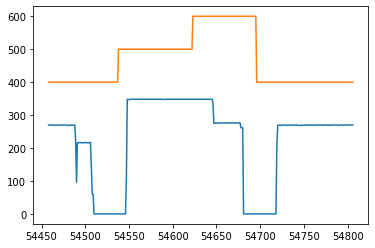

In [73]:
df_tmp = df_modeI[df_modeI['WAFER_ID']==4229773746]
plt.plot(df_tmp['MAIN_OUTER_AIR_BAG_PRESSURE'])
plt.plot(df_tmp['CHAMBER']*100)

In [74]:
features_modeI_test = generate_statistic_features(df_modeI_test)
features_modeII_test = generate_statistic_features(df_modeII_test)
features_modeIII_test = generate_statistic_features(df_modeIII_test)
features_modeI_test.shape, features_modeII_test.shape, features_modeIII_test.shape

((165, 98), (186, 98), (73, 98))

<font color='red'>慎重执行保存操作</font>

In [80]:
# features_modeI_test.to_csv('./data phm 2016/features_modeI_test.csv', index=False)
# features_modeII_test.to_csv('./data phm 2016/features_modeII_test.csv', index=False)
# features_modeIII_test.to_csv('./data phm 2016/features_modeIII_test.csv', index=False)

## 分布

In [86]:
def show_distribution(df:pd.DataFrame, title_name):
    data = df.copy()
    ss = StandardScaler()
    data_ss = ss.fit_transform(data)
    
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data_ss)
    
    plt.figure()
    plt.scatter(data_2d[:,0], data_2d[:,1])
    plt.title(title_name)
    plt.show()

In [87]:
features = pd.concat([features_modeI, features_modeII, features_modeIII])
features = features.set_index(['WAFER_ID', 'STAGE'])

In [88]:
features_I = features_modeI.set_index(['WAFER_ID', 'STAGE'])
features_II = features_modeII.set_index(['WAFER_ID', 'STAGE'])
features_III = features_modeIII.set_index(['WAFER_ID', 'STAGE'])

In [89]:
features_I_test = features_modeI_test.set_index(['WAFER_ID', 'STAGE'])
features_II_test = features_modeII_test.set_index(['WAFER_ID', 'STAGE'])
features_III_test = features_modeIII_test.set_index(['WAFER_ID', 'STAGE'])

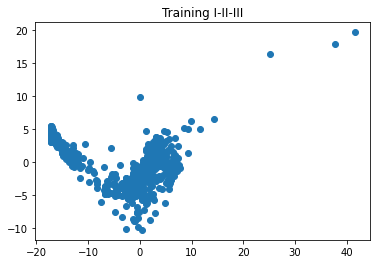

In [57]:
show_distribution(features, 'Training I-II-III')

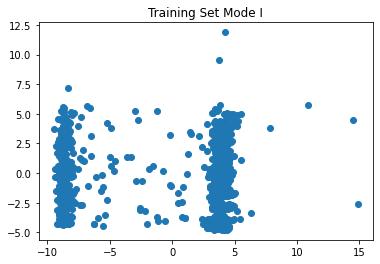

In [58]:
show_distribution(features_I, 'Training Set Mode I')

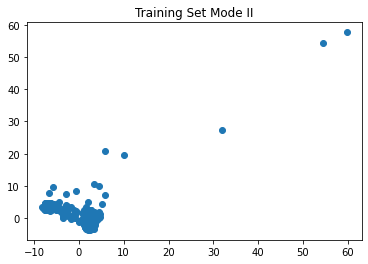

In [59]:
show_distribution(features_II, 'Training Set Mode II')

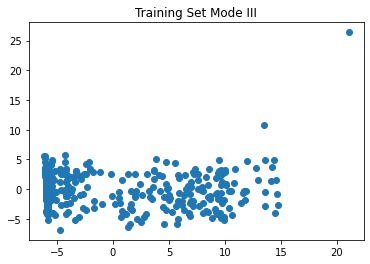

In [60]:
show_distribution(features_III, 'Training Set Mode III')

In [61]:
def show_distribution_two_mode(features_I:pd.DataFrame, 
                               features_II:pd.DataFrame, 
                               features_I_test:pd.DataFrame,
                               features_II_test:pd.DataFrame,
                               label_list):
    ss = StandardScaler()
    features_I_ss = ss.fit_transform(features_I)
    features_II_ss = ss.transform(features_II)
    features_I_test_ss = ss.transform(features_I_test)
    features_II_test_ss = ss.transform(features_II_test)

    pca = PCA(n_components=2)
    features_I_2d = pca.fit_transform(features_I_ss)
    features_II_2d = pca.transform(features_II_ss)
    features_I_test_2d = pca.transform(features_I_test_ss)
    features_II_test_2d = pca.transform(features_II_test_ss)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.scatter(features_I_2d[:,0], features_I_2d[:,1], label=label_list[0])
    plt.scatter(features_II_2d[:,0], features_II_2d[:,1],label=label_list[1])
    plt.legend(); plt.title('Training Set')
    
    plt.subplot(1,2,2)
    plt.scatter(features_I_test_2d[:,0], features_I_test_2d[:,1], label=label_list[0])
    plt.scatter(features_II_test_2d[:,0], features_II_test_2d[:,1],label=label_list[1])
    plt.legend(); plt.title('Test Set')
    plt.show()

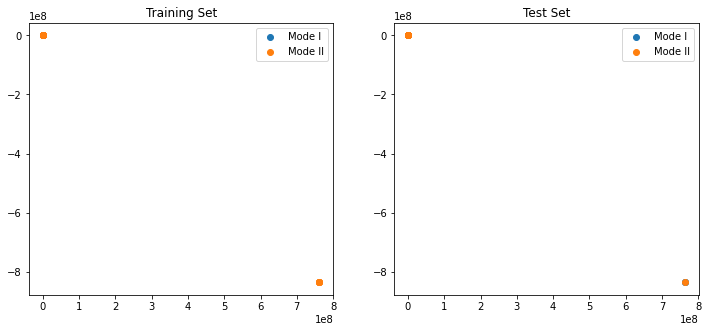

In [62]:
show_distribution_two_mode(features_I, features_II, features_I_test, features_II_test, ['Mode I', 'Mode II'])

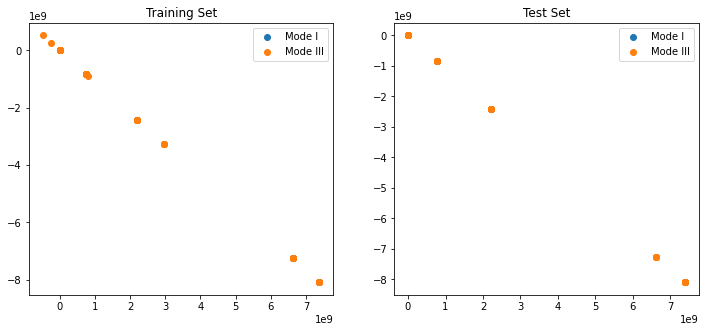

In [63]:
show_distribution_two_mode(features_I, features_III, features_I_test, features_III_test, ['Mode I', 'Mode III'])

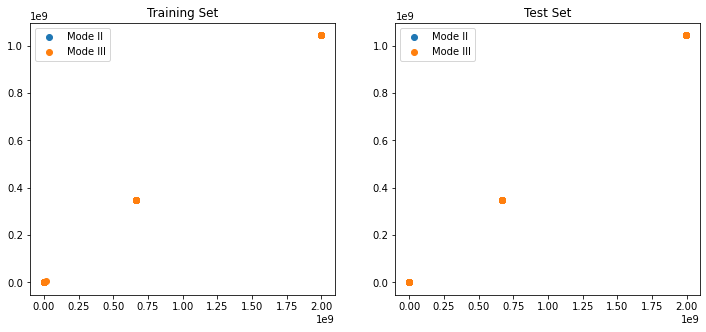

In [64]:
show_distribution_two_mode(features_II, features_III, features_II_test, features_III_test, ['Mode II', 'Mode III'])

# Some Distribution

In [84]:
column_mean = [column for column in column_features if column.endswith('mean')]
column_std = [column for column in column_features if column.endswith('std')]
column_median = [column for column in column_features if column.endswith('median')]
column_sub = [column for column in column_features if column.endswith('sub')]
column_auc = [column for column in column_features if column.endswith('auc') ]

### (1)Single Distribution

Mode I Training Set


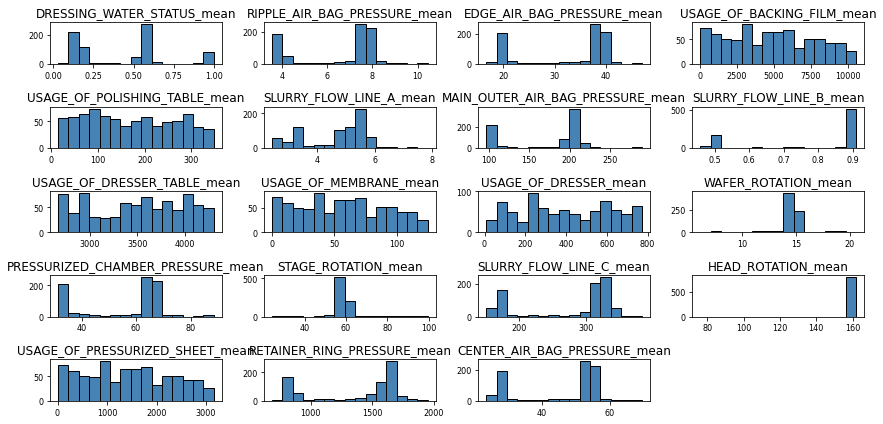

In [66]:
print('Mode I Training Set')
features_I.loc[:, column_mean].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 2.0, 1.5))   

Mode II Trainging Set


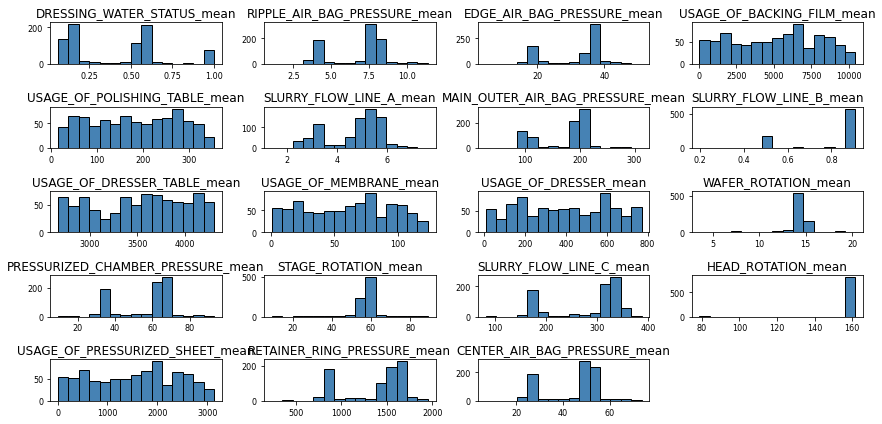

In [67]:
print('Mode II Trainging Set')
features_II.loc[:, column_mean].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, 
                                    xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0,0,2.0,1.5))

Mode III Training Set


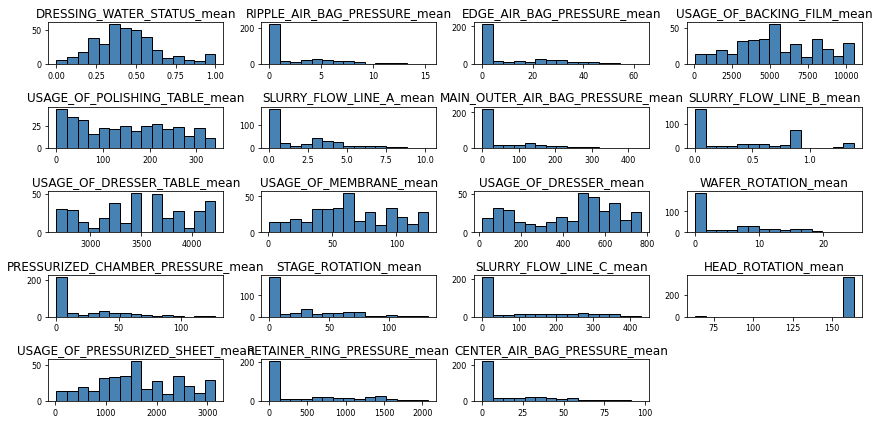

In [68]:
print('Mode III Training Set')
features_III.loc[:,column_mean].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
                 xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0,0,2.0,1.5))

### (2)Visualize2D data

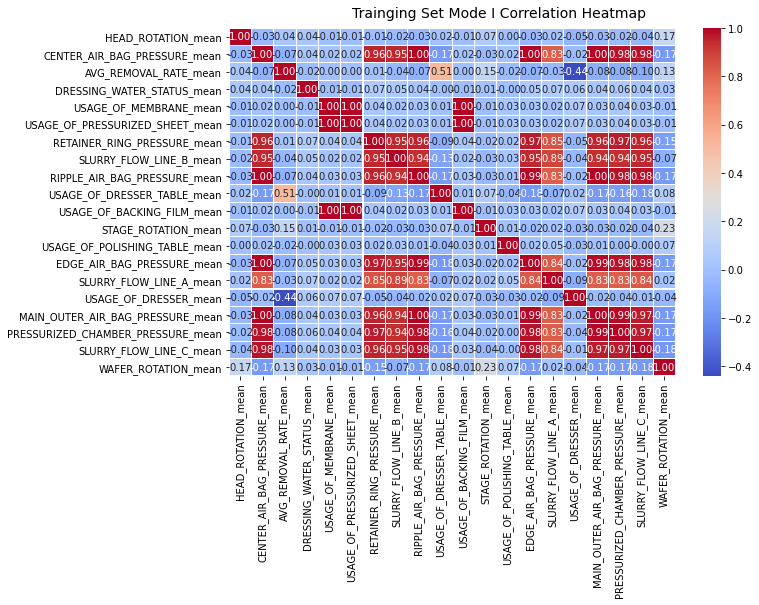

In [431]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = features_I.loc[:,column_mean].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Trainging Set Mode I Correlation Heatmap', fontsize=14)

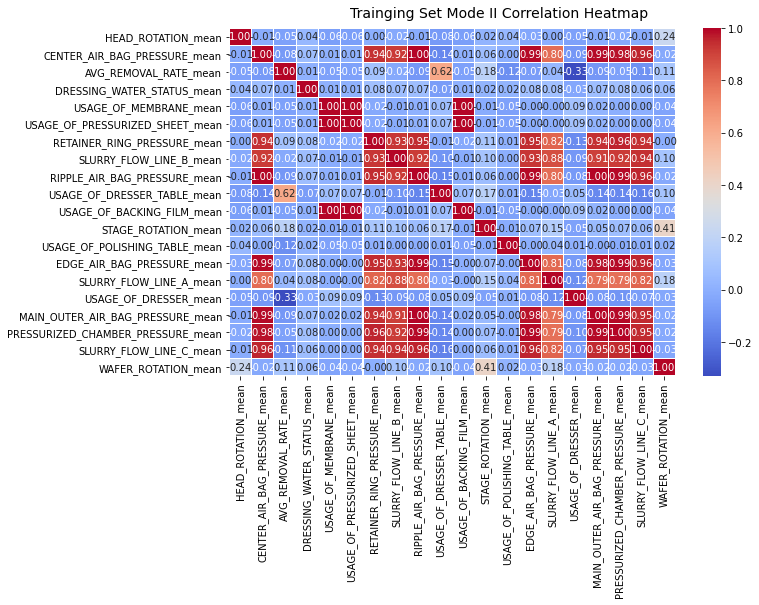

In [432]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr_II = features_II.loc[:, column_mean].corr()
hm = sns.heatmap(round(corr_II,2), annot=True, ax=ax, cmap='coolwarm', fmt='.2f', linewidths=0.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Trainging Set Mode II Correlation Heatmap', fontsize=14)

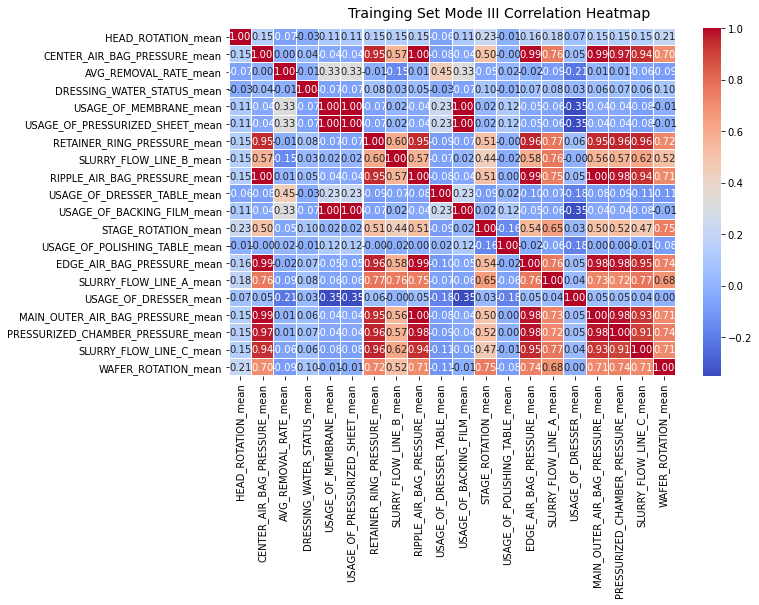

In [433]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr_III = features_III.loc[:, column_mean].corr()
hm = sns.heatmap(round(corr_III,2), annot=True, ax=ax, cmap='coolwarm', fmt='.2f', linewidths=0.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Trainging Set Mode III Correlation Heatmap', fontsize=14)

In [436]:
data1 = features_I.copy()
data2 = features_II.copy()
data1['Mode'] = 'I'
data2['Mode'] = 'II'
data = pd.concat([data1, data2])

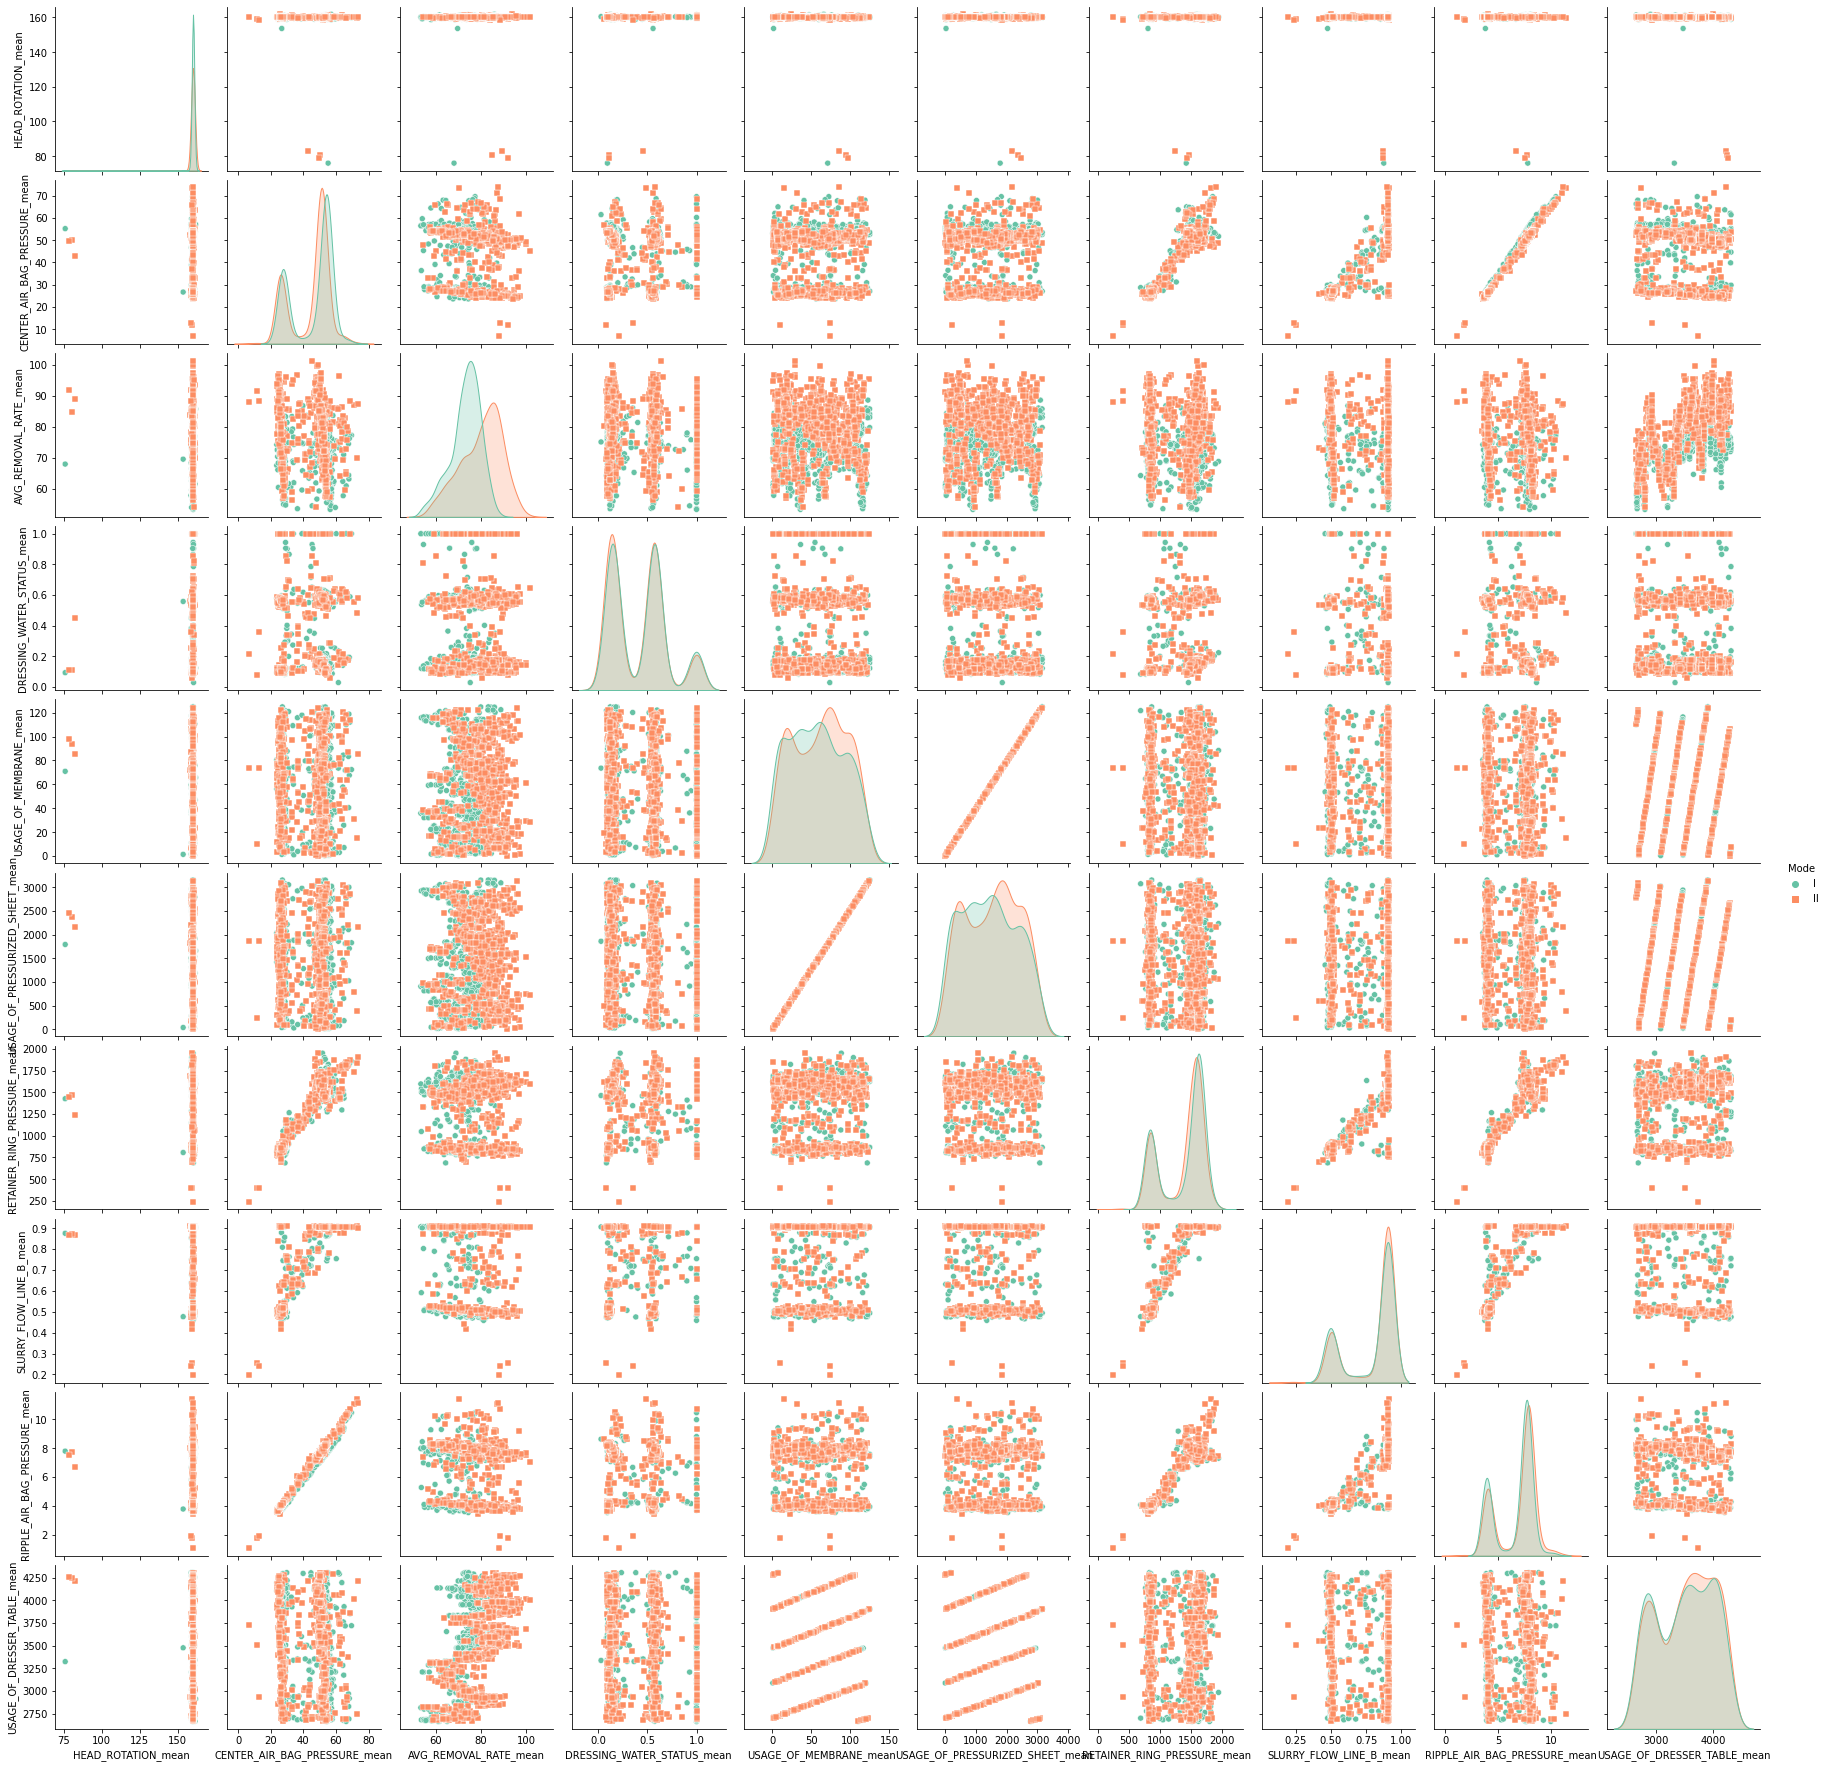

In [438]:
pp = sns.pairplot(data, vars=column_mean[:10], kind="scatter", hue="Mode", markers=["o", "s"], palette="Set2")

Text(0.5, 1.0, 'Mode I-III')

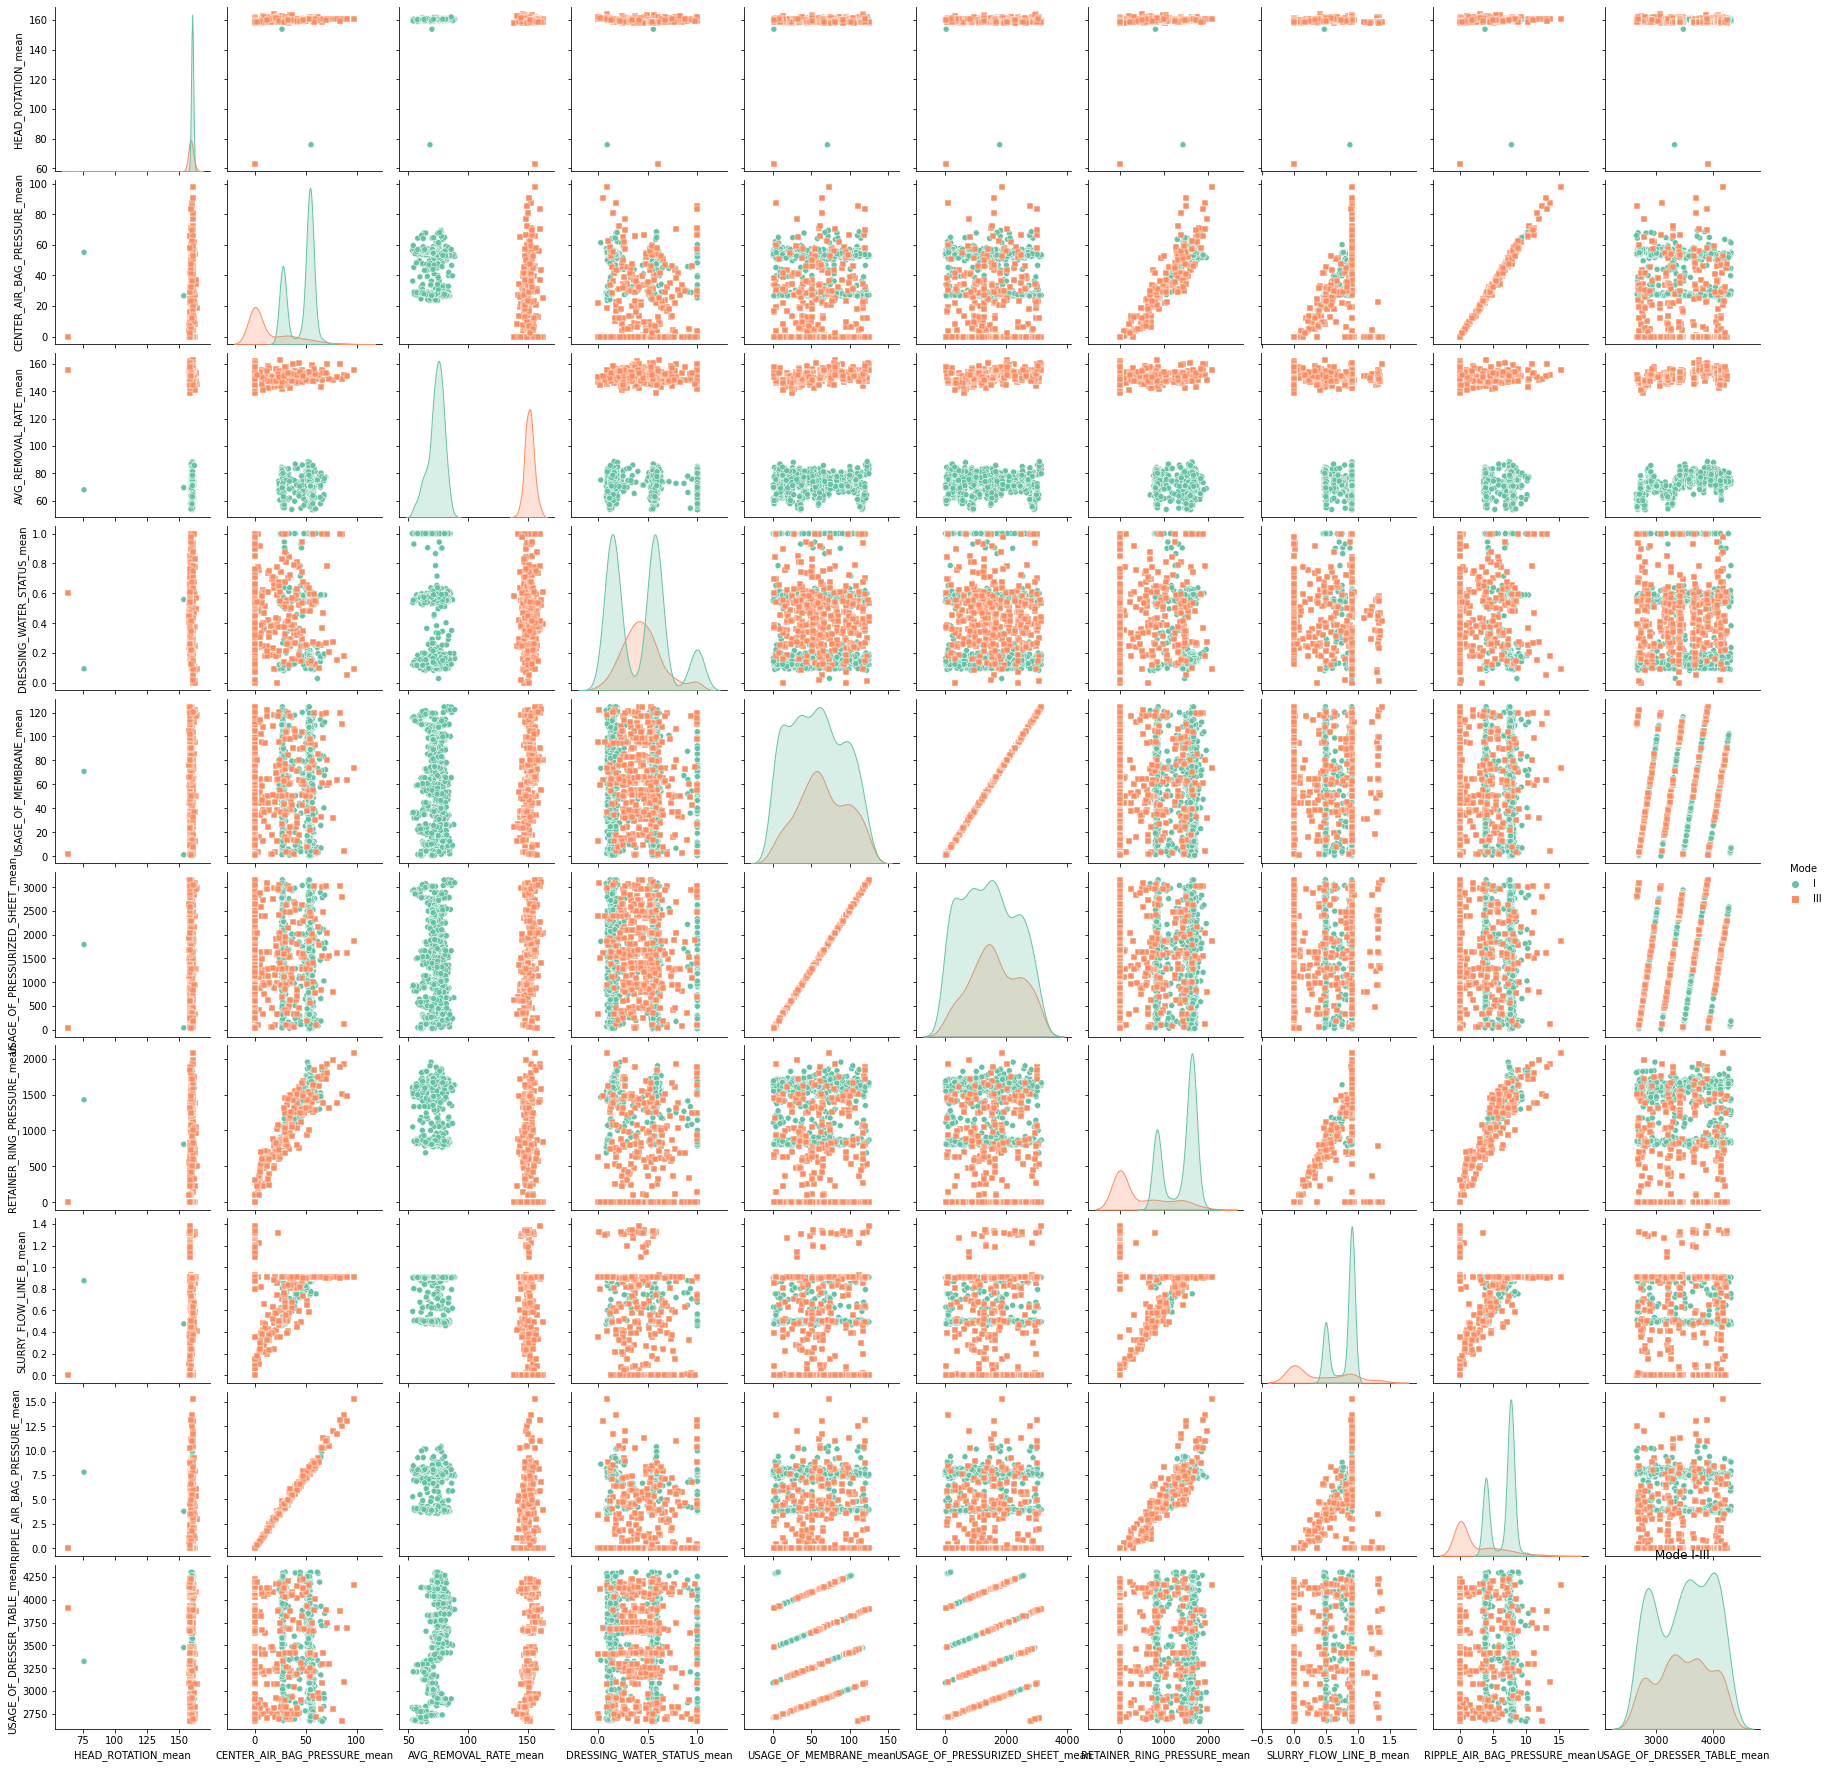

In [439]:
data1 = features_I.copy()
data3 = features_III.copy()
data1['Mode'] = 'I'
data3['Mode'] = 'III'
data = pd.concat([data1, data3])
pp = sns.pairplot(data, vars=column_mean[:10], kind="scatter", hue="Mode", markers=["o", "s"], palette="Set2")
plt.title('Mode I-III')

Mode I-III


/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


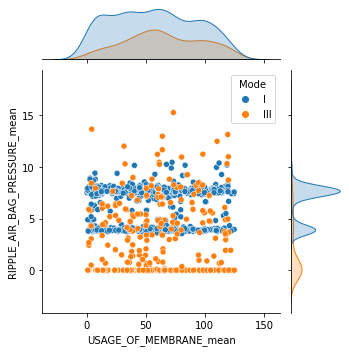

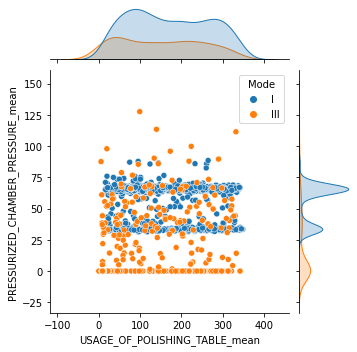

In [467]:
print('Mode I-III')
sns.jointplot(x='USAGE_OF_MEMBRANE_mean', y='RIPPLE_AIR_BAG_PRESSURE_mean', data=data, hue='Mode', kind='scatter', size=5, ratio=4, ax=axes[0])
sns.jointplot(x='USAGE_OF_POLISHING_TABLE_mean', y='PRESSURIZED_CHAMBER_PRESSURE_mean', data=data, hue='Mode', kind='scatter', size=5, ratio=4, ax=axes[1])

In [553]:
column_mean

['HEAD_ROTATION_mean',
 'STAGE_ROTATION_mean',
 'CENTER_AIR_BAG_PRESSURE_mean',
 'USAGE_OF_POLISHING_TABLE_mean',
 'EDGE_AIR_BAG_PRESSURE_mean',
 'SLURRY_FLOW_LINE_A_mean',
 'DRESSING_WATER_STATUS_mean',
 'USAGE_OF_MEMBRANE_mean',
 'USAGE_OF_DRESSER_mean',
 'MAIN_OUTER_AIR_BAG_PRESSURE_mean',
 'USAGE_OF_PRESSURIZED_SHEET_mean',
 'PRESSURIZED_CHAMBER_PRESSURE_mean',
 'SLURRY_FLOW_LINE_C_mean',
 'RETAINER_RING_PRESSURE_mean',
 'WAFER_ROTATION_mean',
 'SLURRY_FLOW_LINE_B_mean',
 'RIPPLE_AIR_BAG_PRESSURE_mean',
 'USAGE_OF_DRESSER_TABLE_mean',
 'USAGE_OF_BACKING_FILM_mean']

### Model

#### 整理数据到data_train和data_test

In [90]:
# generate python variable data0/data1/data2
for item in enumerate(['I', 'II', 'III']):
    exec('data'+str(item[0])+'=features_'+item[1]+'.copy()')
    exec('data'+str(item[0])+'[\'Mode\']='+'item[1]')

In [91]:
data_train = pd.concat([data0, data1, data2])
print(data0.shape, data1.shape, data2.shape, data_train.shape)

(798, 97) (815, 97) (364, 97) (1977, 97)


In [92]:
# generate python variable for test data0_test/data1_test/data2_test
for item in enumerate(['I', 'II', 'III']):
    exec('data'+str(item[0])+'_test=features_'+item[1]+'_test.copy()')
    exec('data'+str(item[0])+'_test[\'Mode\']='+'item[1]')

In [100]:
data_test = pd.concat([data0_test, data1_test, data2_test])
print(data0_test.shape, data1_test.shape, data2_test.shape, data_test.shape)

(165, 97) (186, 97) (73, 97) (424, 97)


<font color='red'>慎重执行保存操作</font>

In [95]:
# data_train.to_csv('./data phm 2016/features_three_mode_train.csv', index=True)
# data_test.to_csv('./data phm 2016/features_three_mode_test.csv', index=True)

#### Experiment 1: Mode作为输入特征

In [73]:
# Example Code
# X_train = data_train.loc[:, np.hstack([column_features, ['Mode']])]
# y_train = data_train.loc[:, ['AVG_REMOVAL_RATE']]
# X_test = data_test.loc[:, np.hstack([column_features, ['Mode']])]
# y_test = data_test.loc[:, ['AVG_REMOVAL_RATE']]

# le = LabelEncoder()
# X_train['Mode'] = le.fit_transform(X_train['Mode'].astype('str'))
# X_test['Mode'] = le.transform(X_test['Mode'].astype('str'))

# xgb = XGBRegressor()
# xgb.fit(X_train, y_train)

# y_pred = xgb.predict(X_test)

# error_mse = mean_squared_error(y_test, y_pred)
# print(error_mse)

# plt.figure(figsize=(12,6))
# plt.plot(y_test.values, label='Truth')
# plt.plot(y_pred, label='Predicted')
# plt.title('Test Set Prediction Curve')
# plt.legend()
# plt.show()

Xgboost: 11.914528955962027


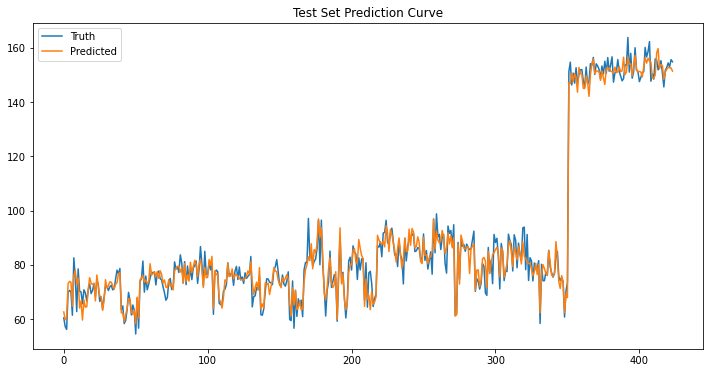

LightGBM: 11.296422871920788


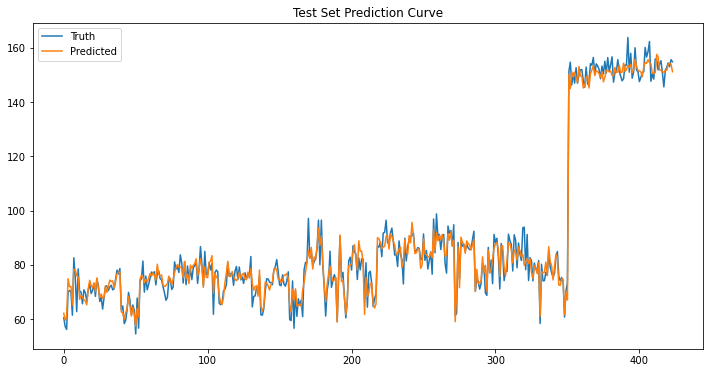

/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GBDT: 13.354417257302195


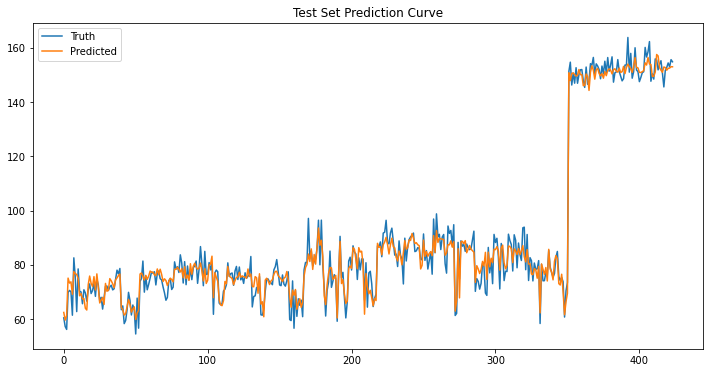

<ipython-input-74-16654a8cde4b>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForest: 11.798007958231574


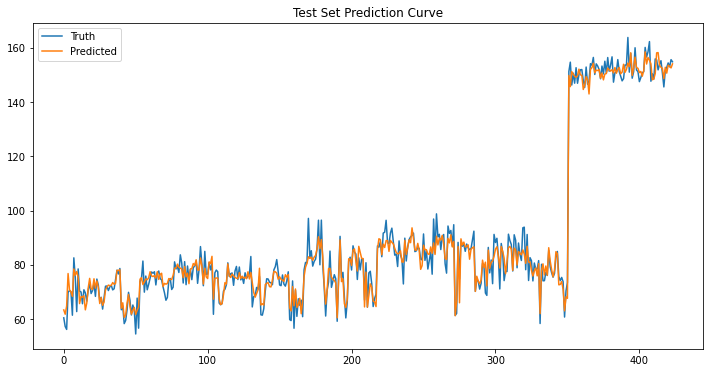

<ipython-input-74-16654a8cde4b>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


ExtraTree: 9.370094536988393


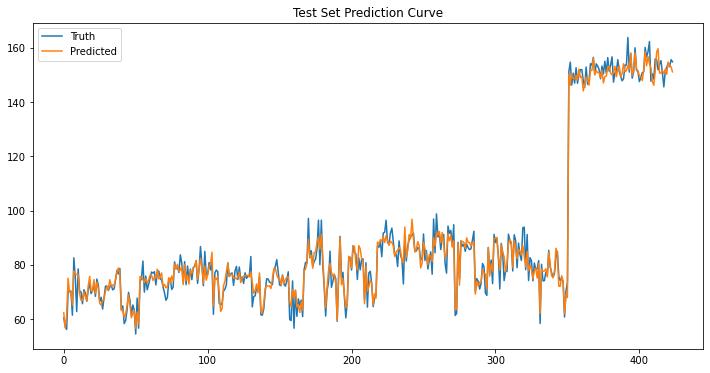

/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoost: 18.985749748674714


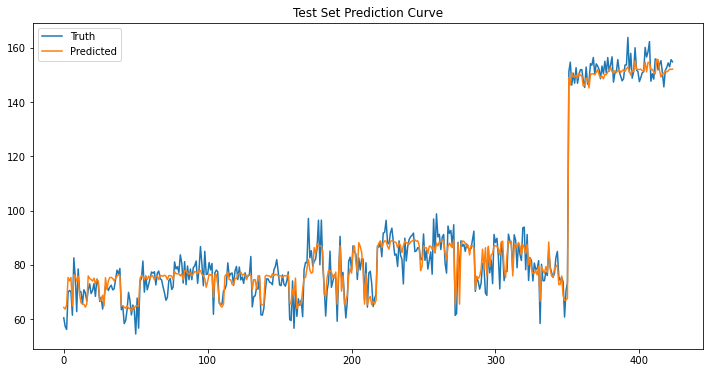

In [74]:
X_train = data_train.loc[:, np.hstack([column_features, ['Mode']])]
y_train = data_train.loc[:, ['AVG_REMOVAL_RATE']]
X_test = data_test.loc[:, np.hstack([column_features, ['Mode']])]
y_test = data_test.loc[:, ['AVG_REMOVAL_RATE']]

le = LabelEncoder()
X_train['Mode'] = le.fit_transform(X_train['Mode'].astype('str'))
X_test['Mode'] = le.transform(X_test['Mode'].astype('str'))

clf_xgb = XGBRegressor()
clf_lgbm = LGBMRegressor()
clf_gbdt = GradientBoostingRegressor()
clf_rf = RandomForestRegressor()
clf_et = ExtraTreesRegressor()
clf_ada = AdaBoostRegressor()
model_list = [clf_xgb, clf_lgbm, clf_gbdt, clf_rf, clf_et, clf_ada]
model_name = ['Xgboost', 'LightGBM', 'GBDT', 'RandomForest', 'ExtraTree', 'AdaBoost']
for i in range(0,len(model_name)):
    model = model_list[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    error_mse = mean_squared_error(y_test, y_pred)
    print(f'{model_name[i]}: {error_mse}')

    plt.figure(figsize=(12,6))
    plt.plot(y_test.values, label='Truth')
    plt.plot(y_pred, label='Predicted')
    plt.title('Test Set Prediction Curve')
    plt.legend()
    plt.show()

#### Experiment 2:没有mode特征

Xgboost
mse: 38.16516998796972
mae: 3.3378600694764335
error std: 30.604620193023862


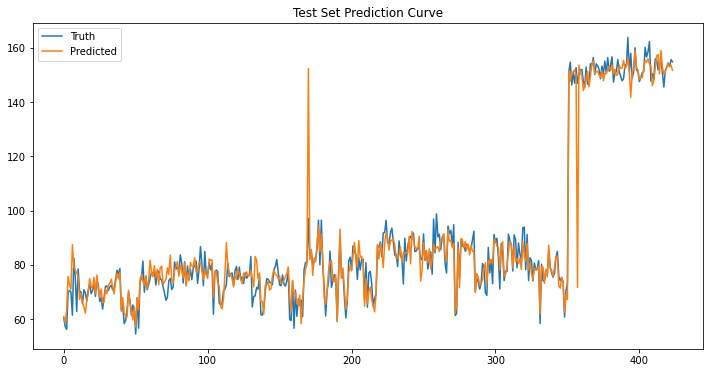

LightGBM
mse: 42.89813316997717
mae: 3.358051842678975
error std: 30.55488390916786


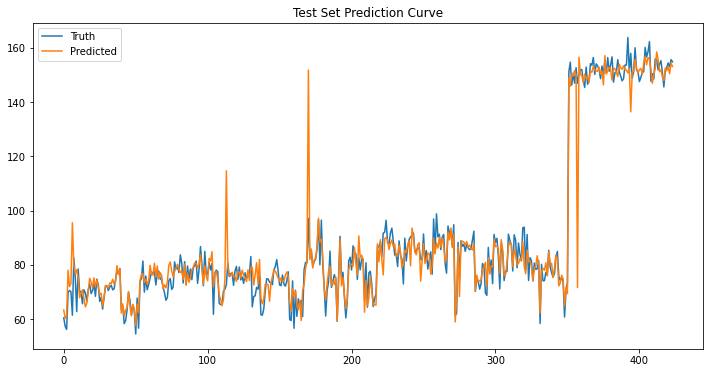

/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GBDT
mse: 50.535570329949074
mae: 3.801678104126103
error std: 30.58009866034961


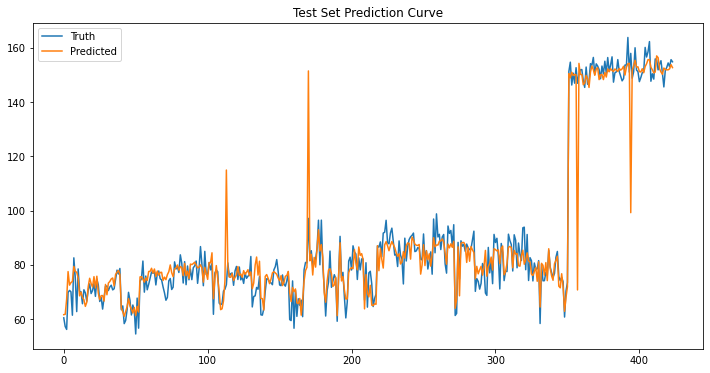

<ipython-input-129-db98e7efbf4c>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForest
mse: 44.530690187894045
mae: 3.3511428042452853
error std: 30.530914717885782


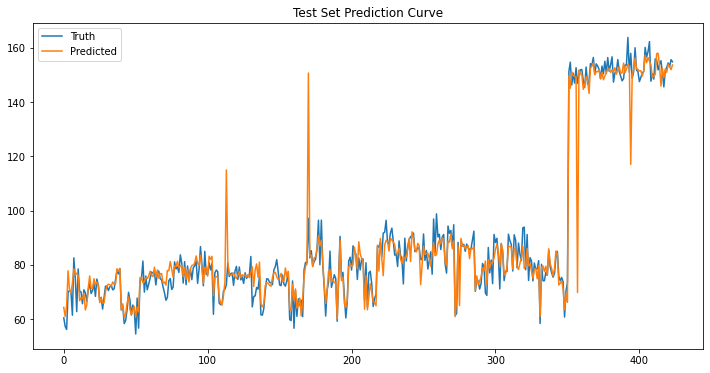

<ipython-input-129-db98e7efbf4c>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


ExtraTree
mse: 38.702661440221064
mae: 3.6621053632075538
error std: 29.81367685572864


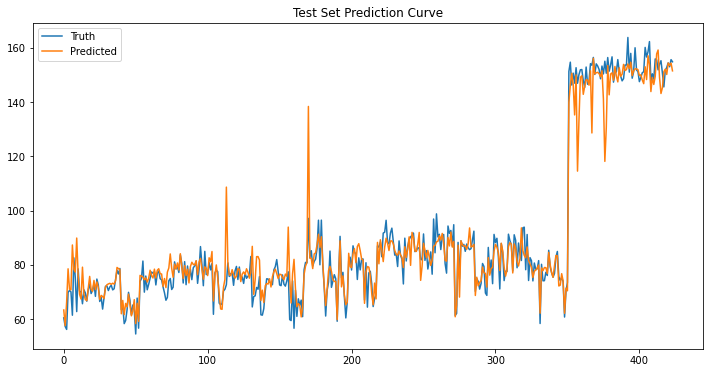

/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoost
mse: 60.34707196228401
mae: 5.406340862741399
error std: 30.627100150423622


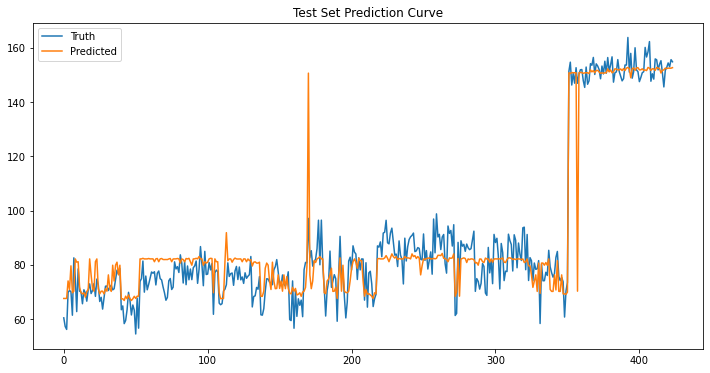

In [129]:
X_train = data_train.loc[:, column_features]
y_train = data_train.loc[:, ['AVG_REMOVAL_RATE']]
X_test = data_test.loc[:, column_features]
y_test = data_test.loc[:, ['AVG_REMOVAL_RATE']]

clf_xgb = XGBRegressor()
clf_lgbm = LGBMRegressor()
clf_gbdt = GradientBoostingRegressor()
clf_rf = RandomForestRegressor()
clf_et = ExtraTreesRegressor()
clf_ada = AdaBoostRegressor()
model_list = [clf_xgb, clf_lgbm, clf_gbdt, clf_rf, clf_et, clf_ada]
model_name = ['Xgboost', 'LightGBM', 'GBDT', 'RandomForest', 'ExtraTree', 'AdaBoost']
for i in range(0,len(model_name)):
    model = model_list[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    error_mse = mean_squared_error(y_test, y_pred)
    print(f'{model_name[i]}')
    print(f'mse: {error_mse}')
    print(f'mae: {mean_absolute_error(y_test, y_pred)}')
    print(f'error std: {np.std(np.abs(y_test.values - y_pred))}')
          
    plt.figure(figsize=(12,6))
    plt.plot(y_test.values, label='Truth')
    plt.plot(y_pred, label='Predicted')
    plt.title('Test Set Prediction Curve')
    plt.legend()
    plt.show()

#### Experiment3:Mode输入特征，分析feature importance排序

In [76]:
X_train = data_train.loc[:, np.hstack([column_features, ['Mode']])]
y_train = data_train.loc[:, ['AVG_REMOVAL_RATE']]
X_test = data_test.loc[:, np.hstack([column_features, ['Mode']])]
y_test = data_test.loc[:, ['AVG_REMOVAL_RATE']]

le = LabelEncoder()
X_train['Mode'] = le.fit_transform(X_train['Mode'].astype('str'))
X_test['Mode'] = le.transform(X_test['Mode'].astype('str'))

gbdt = GradientBoostingRegressor()
gbdt.fit(X_train, y_train)

df_feature_importance = pd.DataFrame()
df_feature_importance['Feature'] = list(X_train.columns)
df_feature_importance['ImportanceScore'] = gbdt.feature_importances_
df_feature_importance = df_feature_importance.sort_values(by=['ImportanceScore'], ascending=False)

df_feature_importance.head(20)

/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Feature  ImportanceScore
95                              Mode         0.948092
40       USAGE_OF_DRESSER_TABLE_mean         0.015501
42     USAGE_OF_DRESSER_TABLE_median         0.009501
50             USAGE_OF_DRESSER_mean         0.009211
52           USAGE_OF_DRESSER_median         0.003024
79                 HEAD_ROTATION_auc         0.002850
54              USAGE_OF_DRESSER_auc         0.001144
34   MAIN_OUTER_AIR_BAG_PRESSURE_auc         0.001079
44        USAGE_OF_DRESSER_TABLE_auc         0.000687
86        RETAINER_RING_PRESSURE_std         0.000623
55               WAFER_ROTATION_mean         0.000498
14         EDGE_AIR_BAG_PRESSURE_auc         0.000463
24      USAGE_OF_POLISHING_TABLE_auc         0.000418
25           SLURRY_FLOW_LINE_A_mean         0.000382
74            SLURRY_FLOW_LINE_C_auc         0.000370
61  PRESSURIZED_CHAMBER_PRESSURE_std         0.000364
29            SLURRY_FLOW_LINE_A_auc         0.000340
94       CENTER_AIR_BAG_PRESSURE_auc         0.000296
70           SLURRY_FLOW_LINE_C_mean         0.000284
20     USAGE_OF_POLISHING_TABLE_mean         0.000254

#### Experiment 4: Mode作为特征，循环10次计算平均误差

In [128]:
X_train = data_train.loc[:, np.hstack([column_features, ['Mode']])]
y_train = data_train.loc[:, ['AVG_REMOVAL_RATE']]
X_test = data_test.loc[:, np.hstack([column_features, ['Mode']])]
y_test = data_test.loc[:, ['AVG_REMOVAL_RATE']]

le = LabelEncoder()
X_train['Mode'] = le.fit_transform(X_train['Mode'].astype('str'))
X_test['Mode'] = le.transform(X_test['Mode'].astype('str'))

clf_xgb = XGBRegressor()
clf_lgbm = LGBMRegressor()
clf_gbdt = GradientBoostingRegressor()
clf_rf = RandomForestRegressor()
clf_et = ExtraTreesRegressor()
clf_ada = AdaBoostRegressor()
model_list = [clf_xgb, clf_lgbm, clf_gbdt, clf_rf, clf_et, clf_ada]
model_name = ['Xgboost', 'LightGBM', 'GBDT', 'RandomForest', 'ExtraTree', 'AdaBoost']
for i in range(0,len(model_name)):
    mses, maes, rmses, r2s, error_stds = [], [], [], [], []
    for _ in range(0,2): # 循环10次，取出来最好的模型
        model = model_list[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        error_mse = mean_squared_error(y_test, y_pred)
        error_mae = mean_absolute_error(y_test, y_pred)
        error_rmse = np.sqrt(error_mse)
        error_r2 = r2_score(y_test, y_pred)
        error_std = np.std(np.abs(y_test.values - y_pred))
        
        mses.append(error_mse); maes.append(error_mae); rmses.append(error_rmse); r2s.append(error_r2)
        error_stds.append(error_std)
    
    idx_best = np.argmin(mses)
    print(f'{model_name[i]}:')
    print(f'mse = {mses[idx_best]}')
    print(f'mae = {maes[idx_best]}')
    print(f'rmse = {rmses[idx_best]}')
    print(f'r2_score = {r2s[idx_best]}')
    print(f'error std = {error_stds[idx_best]}')
    print('\n')

Xgboost:
mse = 11.914528955962027
mae = 2.608554469731169
rmse = 3.4517428867112954
r2_score = 0.986365540399642
error std = 30.487182550036536


LightGBM:
mse = 11.296422871920788
mae = 2.561439387181022
rmse = 3.3610151549674376
r2_score = 0.9870728736448542
error std = 30.5064367183381




/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GBDT:
mse = 13.380072691834243
mae = 2.8394096627180563
rmse = 3.657878167986769
r2_score = 0.9846884370132502
error std = 30.57937896761723




<ipython-input-128-f2e81149fc4d>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-128-f2e81149fc4d>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForest:
mse = 11.66069200027639
mae = 2.5369260990566036
rmse = 3.414775541712279
r2_score = 0.9866560201769093
error std = 30.598662163219807




<ipython-input-128-f2e81149fc4d>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-128-f2e81149fc4d>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


ExtraTree:
mse = 9.642017308962046
mae = 2.3251789846698165
rmse = 3.1051597879919233
r2_score = 0.9889661021471426
error std = 30.531208263140616




/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoost:
mse = 20.388050352330232
mae = 3.5501356269015365
rmse = 4.51531287424584
r2_score = 0.9766688175515482
error std = 30.36632754862292




#### Experiment 5: One-hot Encoder， 和LabelEncoder比较，效果一样，没有采用OneHotEncoder

Xgboost: 11.86828193455125


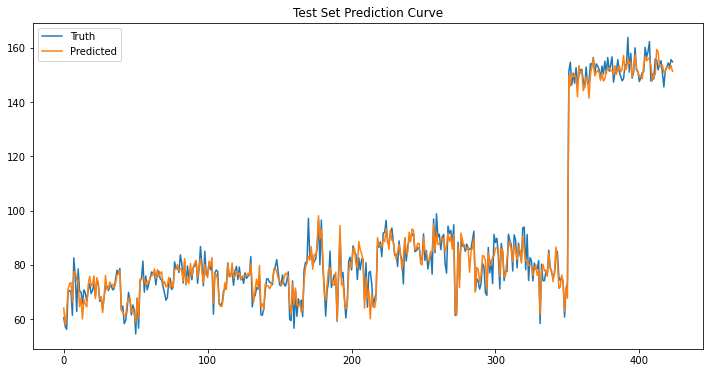

LightGBM: 11.33535164721137


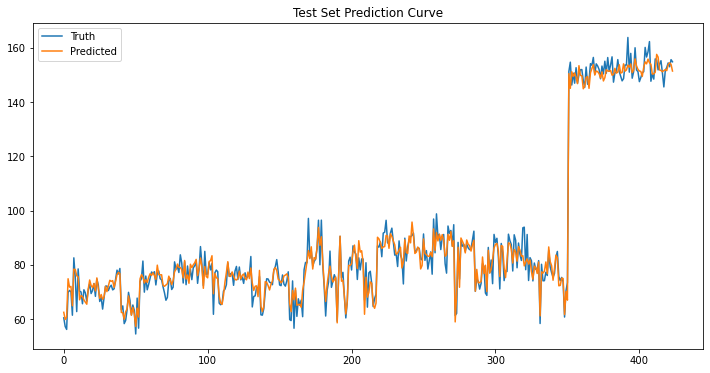

/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GBDT: 13.520036239631967


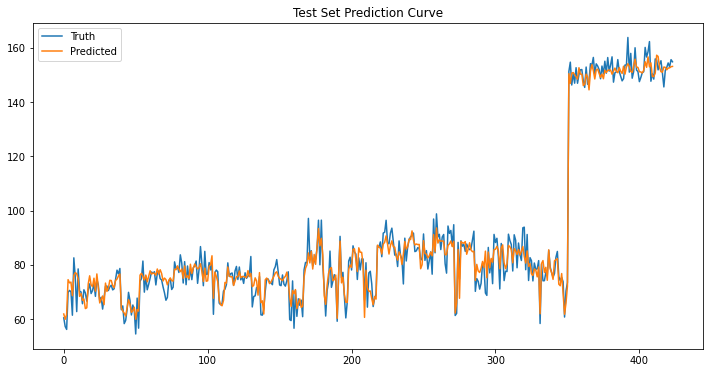

<ipython-input-108-ecc6299ec7b7>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForest: 11.516668757448928


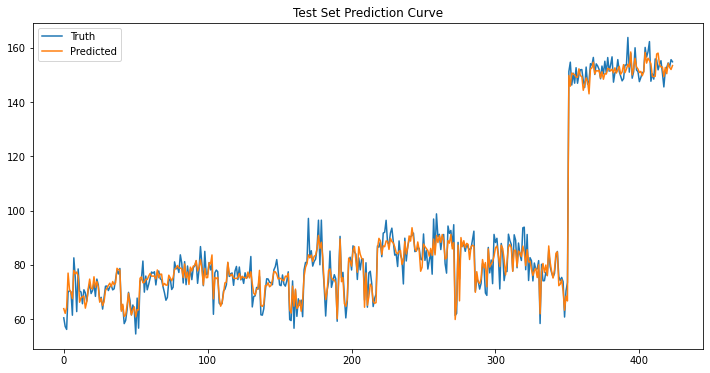

<ipython-input-108-ecc6299ec7b7>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


ExtraTree: 9.646907984966484


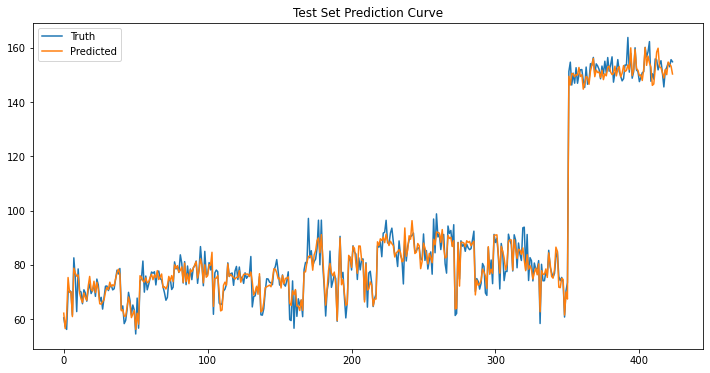

/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoost: 20.09930056122421


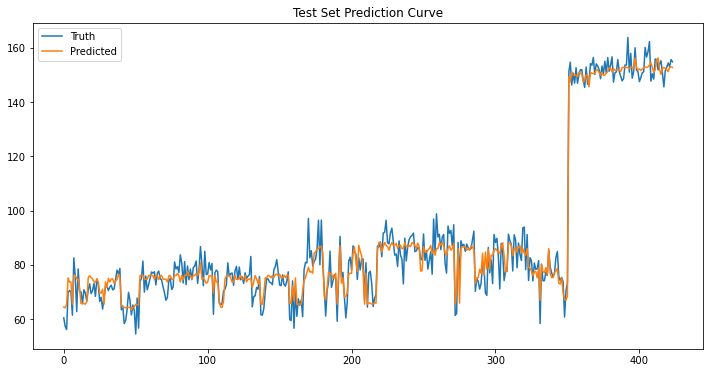

In [108]:
# OneHotEncoder
onehot_encoder = OneHotEncoder()
mode_array = onehot_encoder.fit_transform(data_train[['Mode']]).toarray()
column_mode = [f'Mode_{i}' for i in range(0, mode_array.shape[1])]
df_mode_array = pd.DataFrame(data=mode_array, columns=column_mode, index=data_train.index)
X_train = pd.merge(data_train.loc[:, column_features], df_mode_array, left_index=True, right_index=True)

mode_array_test = onehot_encoder.transform(data_test[['Mode']]).toarray()
df_mode_array_test = pd.DataFrame(data=mode_array_test, columns=column_mode, index=data_test.index)
X_test = pd.merge(data_test.loc[:, column_features], df_mode_array_test, left_index=True, right_index=True)

y_train = data_train.loc[:, ['AVG_REMOVAL_RATE']]
y_test = data_test.loc[:, ['AVG_REMOVAL_RATE']]

clf_xgb = XGBRegressor()
clf_lgbm = LGBMRegressor()
clf_gbdt = GradientBoostingRegressor()
clf_rf = RandomForestRegressor()
clf_et = ExtraTreesRegressor()
clf_ada = AdaBoostRegressor()
model_list = [clf_xgb, clf_lgbm, clf_gbdt, clf_rf, clf_et, clf_ada]
model_name = ['Xgboost', 'LightGBM', 'GBDT', 'RandomForest', 'ExtraTree', 'AdaBoost']
for i in range(0,len(model_name)):
    model = model_list[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    error_mse = mean_squared_error(y_test, y_pred)
    print(f'{model_name[i]}: {error_mse}')

    plt.figure(figsize=(12,6))
    plt.plot(y_test.values, label='Truth')
    plt.plot(y_pred, label='Predicted')
    plt.title('Test Set Prediction Curve')
    plt.legend()
    plt.show()

#### Experiment 6: One-hot Encoder--Feature Importance，和LabelEncoder比较，效果一样，没有采用OneHotEncoder

In [109]:
onehot_encoder = OneHotEncoder()
mode_array = onehot_encoder.fit_transform(data_train[['Mode']]).toarray()
column_mode = [f'Mode_{i}' for i in range(0, mode_array.shape[1])]
df_mode_array = pd.DataFrame(data=mode_array, columns=column_mode, index=data_train.index)
X_train = pd.merge(data_train.loc[:, column_features], df_mode_array, left_index=True, right_index=True)

mode_array_test = onehot_encoder.transform(data_test[['Mode']]).toarray()
df_mode_array_test = pd.DataFrame(data=mode_array_test, columns=column_mode, index=data_test.index)
X_test = pd.merge(data_test.loc[:, column_features], df_mode_array_test, left_index=True, right_index=True)

y_train = data_train.loc[:, ['AVG_REMOVAL_RATE']]
y_test = data_test.loc[:, ['AVG_REMOVAL_RATE']]

gbdt = GradientBoostingRegressor()
gbdt.fit(X_train, y_train)

df_feature_importance = pd.DataFrame()
df_feature_importance['Feature'] = list(X_train.columns)
df_feature_importance['ImportanceScore'] = gbdt.feature_importances_
df_feature_importance = df_feature_importance.sort_values(by=['ImportanceScore'], ascending=False)

df_feature_importance.head(20)

/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Feature  ImportanceScore
97                            Mode_2         0.935417
40       USAGE_OF_DRESSER_TABLE_mean         0.016703
42     USAGE_OF_DRESSER_TABLE_median         0.008165
52           USAGE_OF_DRESSER_median         0.007834
96                            Mode_1         0.007541
95                            Mode_0         0.005385
50             USAGE_OF_DRESSER_mean         0.004445
79                 HEAD_ROTATION_auc         0.002805
54              USAGE_OF_DRESSER_auc         0.001142
34   MAIN_OUTER_AIR_BAG_PRESSURE_auc         0.001105
86        RETAINER_RING_PRESSURE_std         0.000604
44        USAGE_OF_DRESSER_TABLE_auc         0.000585
55               WAFER_ROTATION_mean         0.000516
14         EDGE_AIR_BAG_PRESSURE_auc         0.000441
24      USAGE_OF_POLISHING_TABLE_auc         0.000441
74            SLURRY_FLOW_LINE_C_auc         0.000374
25           SLURRY_FLOW_LINE_A_mean         0.000371
61  PRESSURIZED_CHAMBER_PRESSURE_std         0.000369
29            SLURRY_FLOW_LINE_A_auc         0.000327
70           SLURRY_FLOW_LINE_C_mean         0.000315

# 不同mode的变量变化曲线一致嘛

In [19]:
X_train = np.load("./data phm 2016/X_train_r_three_mode.npy")
with open("./data phm 2016/wafer_id_mode_train_three_mode.pkl", "rb") as f:
    wafer_ids_mode = pickle.load(f)

In [31]:
wafer_ids_mode

[(-4230160598, 'I'),
 (-4230160594, 'II'),
 (-4230160436, 'II'),
 (-4230160428, 'I'),
 (-4230160424, 'I'),
 (-4230160424, 'II'),
 (-4230160416, 'II'),
 (-4230160408, 'I'),
 (-4230160408, 'II'),
 (-4228160702, 'I'),
 (-4228160702, 'II'),
 (-4228160698, 'II'),
 (-4228160694, 'II'),
 (-4228160690, 'I'),
 (-4228160690, 'II'),
 (-4228160686, 'I'),
 (-4228160686, 'II'),
 (-4228160682, 'I'),
 (-4228160678, 'I'),
 (-4228160670, 'I'),
 (-4228160670, 'II'),
 (-4228160662, 'I'),
 (-4228160662, 'II'),
 (-4228160658, 'I'),
 (-4228160658, 'II'),
 (-4228160642, 'I'),
 (-4228160642, 'II'),
 (-4228160608, 'II'),
 (-4228160604, 'I'),
 (-4228160600, 'I'),
 (-4228160600, 'II'),
 (-4228160596, 'I'),
 (-4228160580, 'I'),
 (-4228160580, 'II'),
 (-4226160424, 'I'),
 (-4226160424, 'II'),
 (-4226160416, 'I'),
 (-4226160416, 'II'),
 (-4226160404, 'II'),
 (-4226160396, 'I'),
 (-4226160396, 'II'),
 (-4224160702, 'II'),
 (-4224160694, 'I'),
 (-4224160694, 'II'),
 (-4224160690, 'I'),
 (-4224160690, 'II'),
 (-4224160

In [29]:
with open("./data phm 2016/cols_feature_three_mode.pkl", "rb") as f:
    cols_feature = pickle.load(f)
cols_feature

['USAGE_OF_MEMBRANE',
 'EDGE_AIR_BAG_PRESSURE',
 'USAGE_OF_PRESSURIZED_SHEET',
 'DRESSING_WATER_STATUS',
 'SLURRY_FLOW_LINE_A',
 'RIPPLE_AIR_BAG_PRESSURE',
 'MAIN_OUTER_AIR_BAG_PRESSURE',
 'USAGE_OF_DRESSER',
 'HEAD_ROTATION',
 'SLURRY_FLOW_LINE_C',
 'CENTER_AIR_BAG_PRESSURE',
 'PRESSURIZED_CHAMBER_PRESSURE',
 'USAGE_OF_POLISHING_TABLE',
 'RETAINER_RING_PRESSURE',
 'USAGE_OF_BACKING_FILM',
 'WAFER_ROTATION',
 'SLURRY_FLOW_LINE_B',
 'STAGE_ROTATION',
 'USAGE_OF_DRESSER_TABLE']

In [34]:
idx_I = 0
idx_II = 2
idx_III = wafer_ids_mode.index((323446644, 'III'))

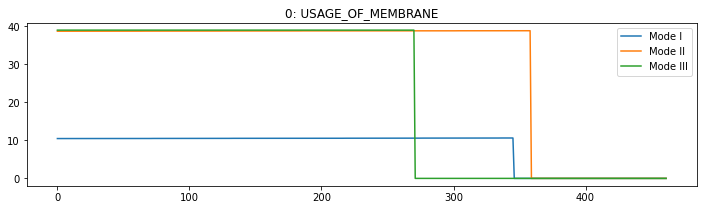

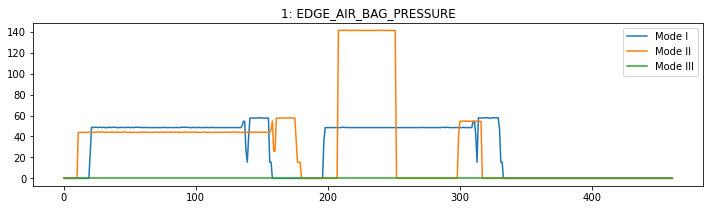

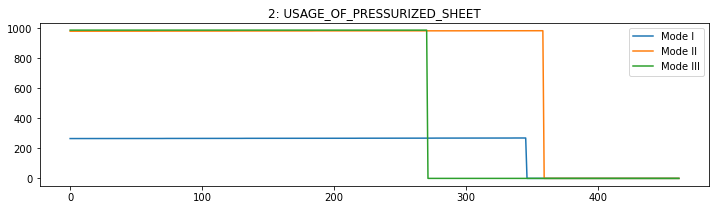

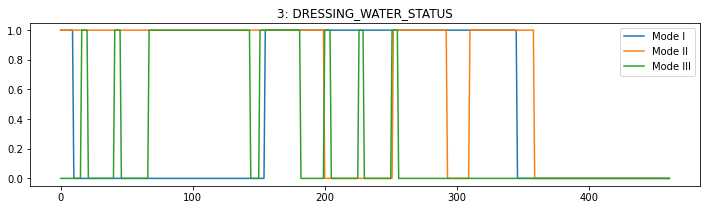

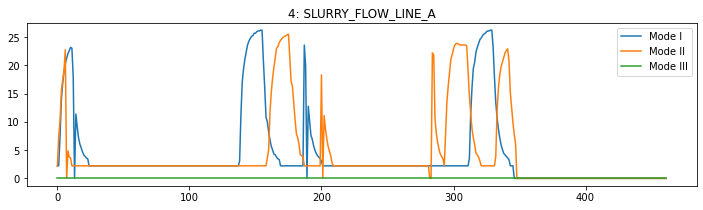

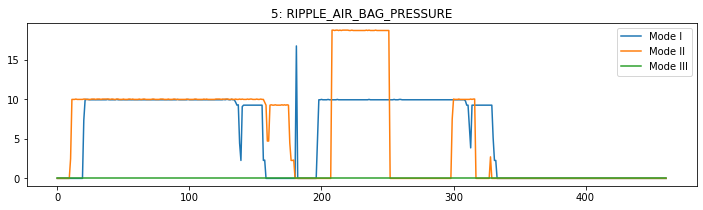

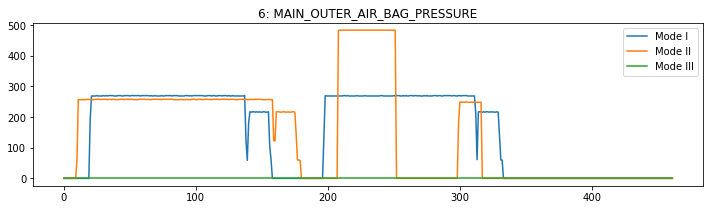

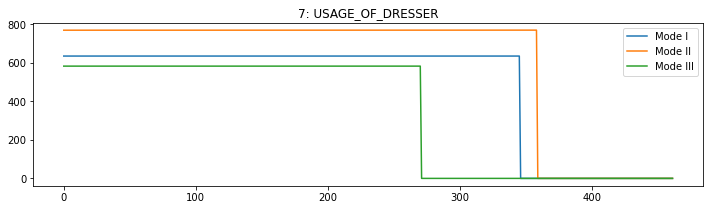

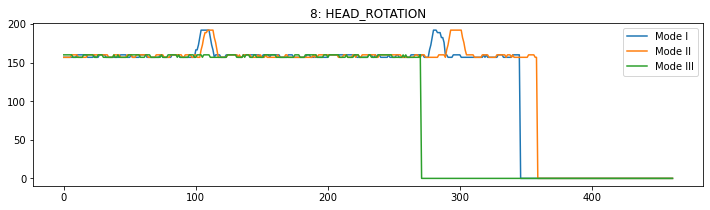

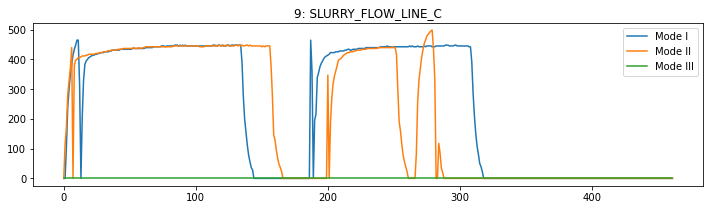

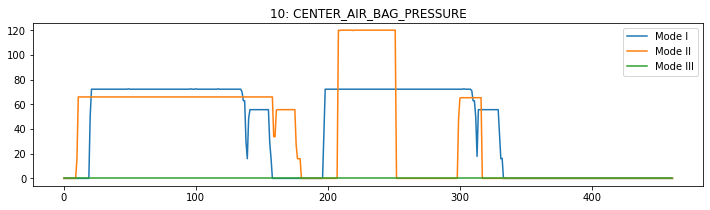

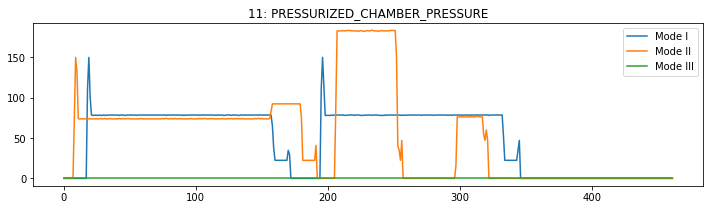

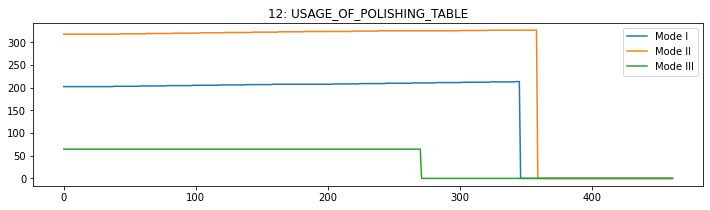

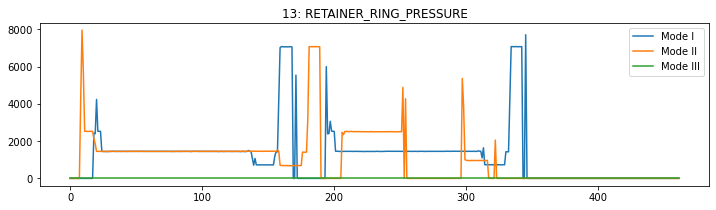

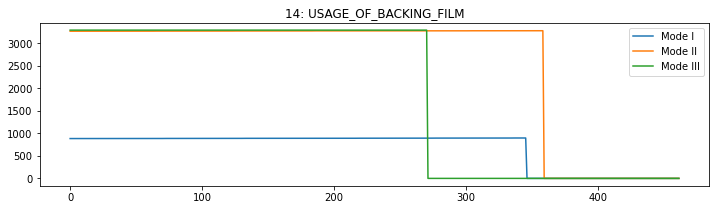

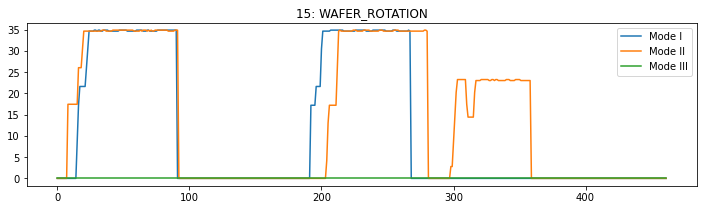

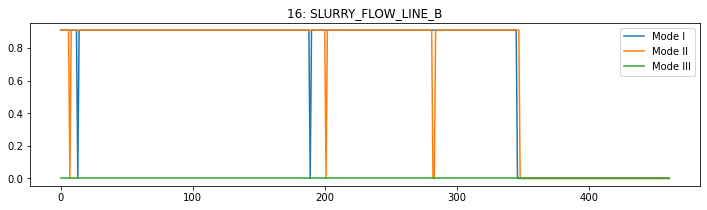

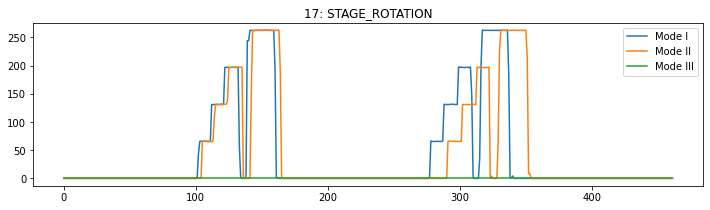

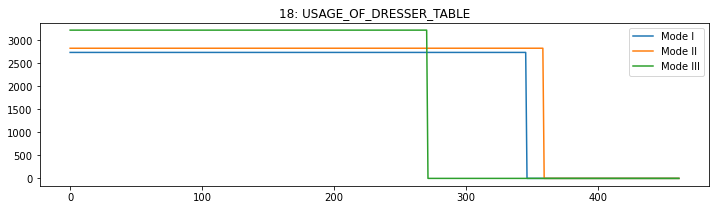

In [36]:
for i in range(0, 19):
    plt.figure(figsize=(12,3))
    plt.plot(X_train[idx_I, :, i], label='Mode I')
    plt.plot(X_train[idx_II, :, i], label='Mode II')
    plt.plot(X_train[idx_III, :, i], label='Mode III')
    plt.legend()
    plt.title(f'{i}: {cols_feature[i]}')
    plt.show()

In [42]:
cols_feature[0],cols_feature[2] # mode I和mode III相似
cols_feature[1],cols_feature[12] # mode I和mode II和mode III都不相似
cols_feature[4,5,6,,9,10,11,13,14,15,16,17] # modeI和mode II相似

('USAGE_OF_MEMBRANE', 'USAGE_OF_PRESSURIZED_SHEET')